<a href="https://colab.research.google.com/github/liveleisurely/ChatGPT_LearningDay/blob/main/%5BchatGPT%EB%9F%AC%EB%8B%9D%EB%8D%B0%EC%9D%B4_1%5D%EC%BD%98%ED%85%90%EC%B8%A0_%EC%A0%9C%EC%9E%91%EC%97%90_%ED%99%9C%EC%9A%A9%ED%95%98%EA%B8%B0_%EC%89%AC%EC%9A%B4_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%83%9D%EC%84%B1_%EB%AA%A8%EB%8D%B8_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공지능팩토리 웨비나 (Mar 7th, 2023) 데모 시연 프로그램




> 작성자. 이정민 (스모어톡, https://smoreday.oopy.io)

> 디지털 이미지 어시스턴트, 스모어데이 (https://bit.ly/smoredaykr)

> 코드나 모델 사용 관련 문의가 있다면 이메일(support@smoretalk.io) 혹은 서베이 응답(https://airtable.com/shrNH4tB8YSkd8PHp) 을 통해 연락주세요.

_

본 프로그램은 이미지 모델을 쉽게 사용해보고 싶은 초보자 분들을 위해 작성한 자료입니다.

보다 자세한 내용은 프로그램 작성에 참고한 Hugging Face 내 블로그 글(https://huggingface.co/blog/controlnet) 을 참고해주세요. 

# 1. GPU 세팅 확인


1.   **상단 탭에서 Runtime 클릭 - Change runtime type 클릭 - Hardware Accelerator 의 값을 GPU로 변경** 을 진행해주세요

2.   셀 좌측 [ ] 버튼을 눌러주세요.

In [ ]:
! nvidia-smi
! nvcc -V
! free -h

Wed Mar  8 08:15:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 2. 구글 드라이브 연동


셀 좌측 [ ] 버튼만 눌러주세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3. 필요 라이브러리 설치


셀 좌측 [ ] 버튼만 눌러주세요.

In [ ]:
!pip install -q diffusers==0.14.0
!pip install -q transformers xformers git+https://github.com/huggingface/accelerate.git
!pip install -q opencv-contrib-python
!pip install -q controlnet_aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 111.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 5.0 MB/s eta 0:00:00


#4. **이미지 업로드**


1.   **구글 드라이브** 안 내 드라이브에 이미지 윤곽을 얻기를 원하는 이미지를 저장합니다.

2.   화면 좌측 이미지 폴더 모양 클릭 - drive 클릭 - MyDrive 클릭 - 해당 **이미지에서 Copy Path(경로 복사)** 를 합니다.

3.   셀 내 **image_path 에 붙여넣기** 해주세요.

4.   셀 좌측 [ ] 버튼을 눌러주세요.

Error caught was: No module named 'triton'


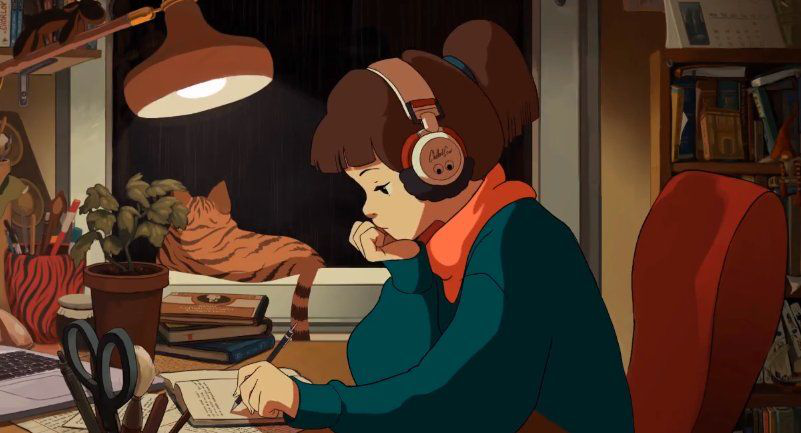

In [ ]:
from diffusers.utils import load_image

image_path = "/content/drive/MyDrive/lofi_background.jfif" #@param {type: "string"}

image = load_image(
    image_path
)
image

#5. 이미지 윤곽 얻기


셀 좌측 [ ] 버튼만 눌러주세요.

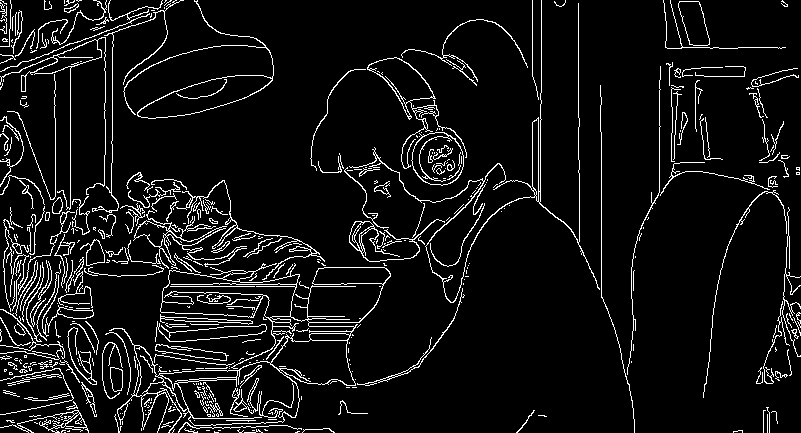

In [ ]:
import cv2
from PIL import Image
import numpy as np

image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
canny_image

#6. **모델 업로드**


1.   **Hugging Face (https://huggingface.co/)** 에서 사용하고 싶은 모델을 검색합니다. (Default: runwayml/stable-diffusion-v1-5, https://huggingface.co/runwayml/stable-diffusion-v1-5)

2.   모델을 검색했다면, 작성자/모델명 을 복사합니다.

3.   해당 값을 셀 내 **model_id 에 붙여넣기** 해주세요.

4.   셀 좌측 [ ] 버튼을 눌러주세요.

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, UniPCMultistepScheduler, ControlNetModel
import torch

model_id = "runwayml/stable-diffusion-v1-5" #@param {type: "string"}

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    model_id, controlnet=controlnet, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to("cuda")

pipe.enable_xformers_memory_efficient_attention()

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


#7. **프롬프트 입력**


1.   셀 내 **prompt** 에는 이미지를 만들고 싶은 상황을 영어 키워드로 작성합니다.

2.   셀 내 **negative_prompt** 에는 이미지 생성 시 제외하고 싶은 조건을 영어 키워드로 작성합니다.

3.   셀 내 **seed_num** 은 슬라이드 바를 이동시켜 값을 지정합니다. 값에 따라 이미지의 종류가 달라집니다.

4.   셀 내 **step_num** 은 슬라이드 바를 이동시켜 값을 지정합니다. 높은 값일 수록 이미지의 품질이 좋아지는 대신 생성 시간이 오래 소요됩니다.

5.   셀 좌측 [ ] 버튼을 눌러주세요. 이미지가 완성됩니다.

  0%|          | 0/70 [00:00<?, ?it/s]

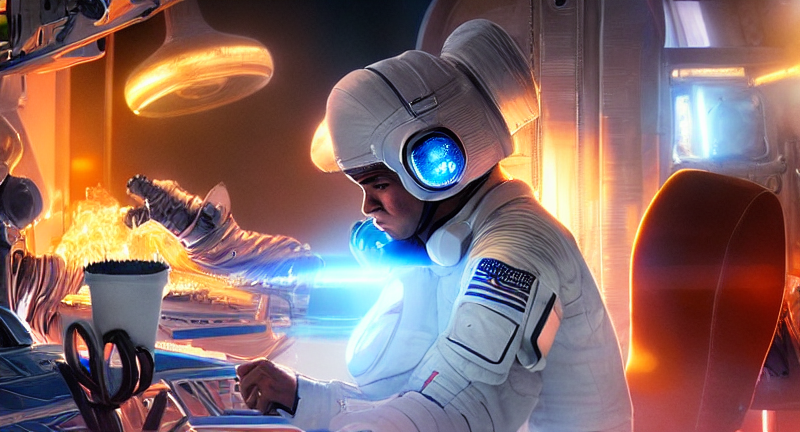

In [ ]:
prompt = 'An astronaut, in spaceship, lighting, cheerful, masterpiece, best quality, CG, wallpaper, HDR, high quality, high definition, extremely detailed, trending on Artstation' #@param {type: "string"}
negative_prompt = 'lowres, (bad anatomy, bad hands:1.1), text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, artist name, b&w, weird colors, (cartoon, 3d, bad art, poorly drawn, close up, blurry:1.5), (disfigured, deformed, extra limbs:1.5)' #@param {type: "string"}
prompt = [prompt]
negative_prompt = [negative_prompt]


seed_num = 30 #@param {type:"slider", min:1, max:100, step:1}
generator = torch.Generator(device='cuda').manual_seed(seed_num)

step_num = 70 #@param {type:"slider", min:30, max:120, step:1}

image = pipe(
    prompt,
    canny_image,
    negative_prompt=negative_prompt,
    generator=generator,
    num_inference_steps=step_num,
).images[0]

image